Import necessary libraries/modules

In [ ]:
import pandas as pd
#from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

Construct a pandas Data-frame object from the Iris plants dataset

In [ ]:
data = '/content/car_evaluation_modified.csv'
dataset = pd.read_csv(data)
dataset

,buying,maint,doors,persons,lug_boot,rating
0,vhigh,vhigh,2,2,small,unacc
1,vhigh,vhigh,2,2,small,unacc
2,vhigh,vhigh,2,2,small,unacc
3,vhigh,vhigh,2,2,med,unacc
4,vhigh,vhigh,2,2,med,unacc
...,...,...,...,...,...,...
1723,low,low,5more,more,med,good
1724,low,low,5more,more,med,vgood
1725,low,low,5more,more,big,unacc
1726,low,low,5more,more,big,good


In [ ]:
col_names = dataset.columns.tolist()
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'rating']

In [ ]:
enc = OrdinalEncoder()
enc.fit(dataset[col_names])
dataset[col_names] = enc.transform(dataset[col_names])
dataset

,buying,maint,doors,persons,lug_boot,rating
0,3.0,3.0,0.0,0.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,1.0


Splitting the dataset into training and test sets

In [ ]:
X = dataset.copy().drop(['rating'],axis=1)
y = dataset['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a Decision-Tree Classifier object using the sklearn defined class and parameter values

In [ ]:
dtree = DecisionTreeClassifier(max_depth=5,criterion='entropy')
dtree = dtree.fit(X_train.to_numpy(), y_train.to_numpy()) #build the tree on the training set

In [ ]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Obtain the tree's predictions on test set, accuracy on test set and display the tree

In [ ]:
predictions=dtree.predict(X_train)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([2., 0., 2., ..., 0., 2., 2.])

In [ ]:
dtree.predict_proba(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([[0.        , 0.        , 1.        , 0.        ],
       [0.62608696, 0.        , 0.37391304, 0.        ],
       [0.24336283, 0.2300885 , 0.34513274, 0.18141593],
       ...,
       [0.62608696, 0.        , 0.37391304, 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ]])

In [ ]:
accuracy_score(y_train, predictions)

0.743849493487699

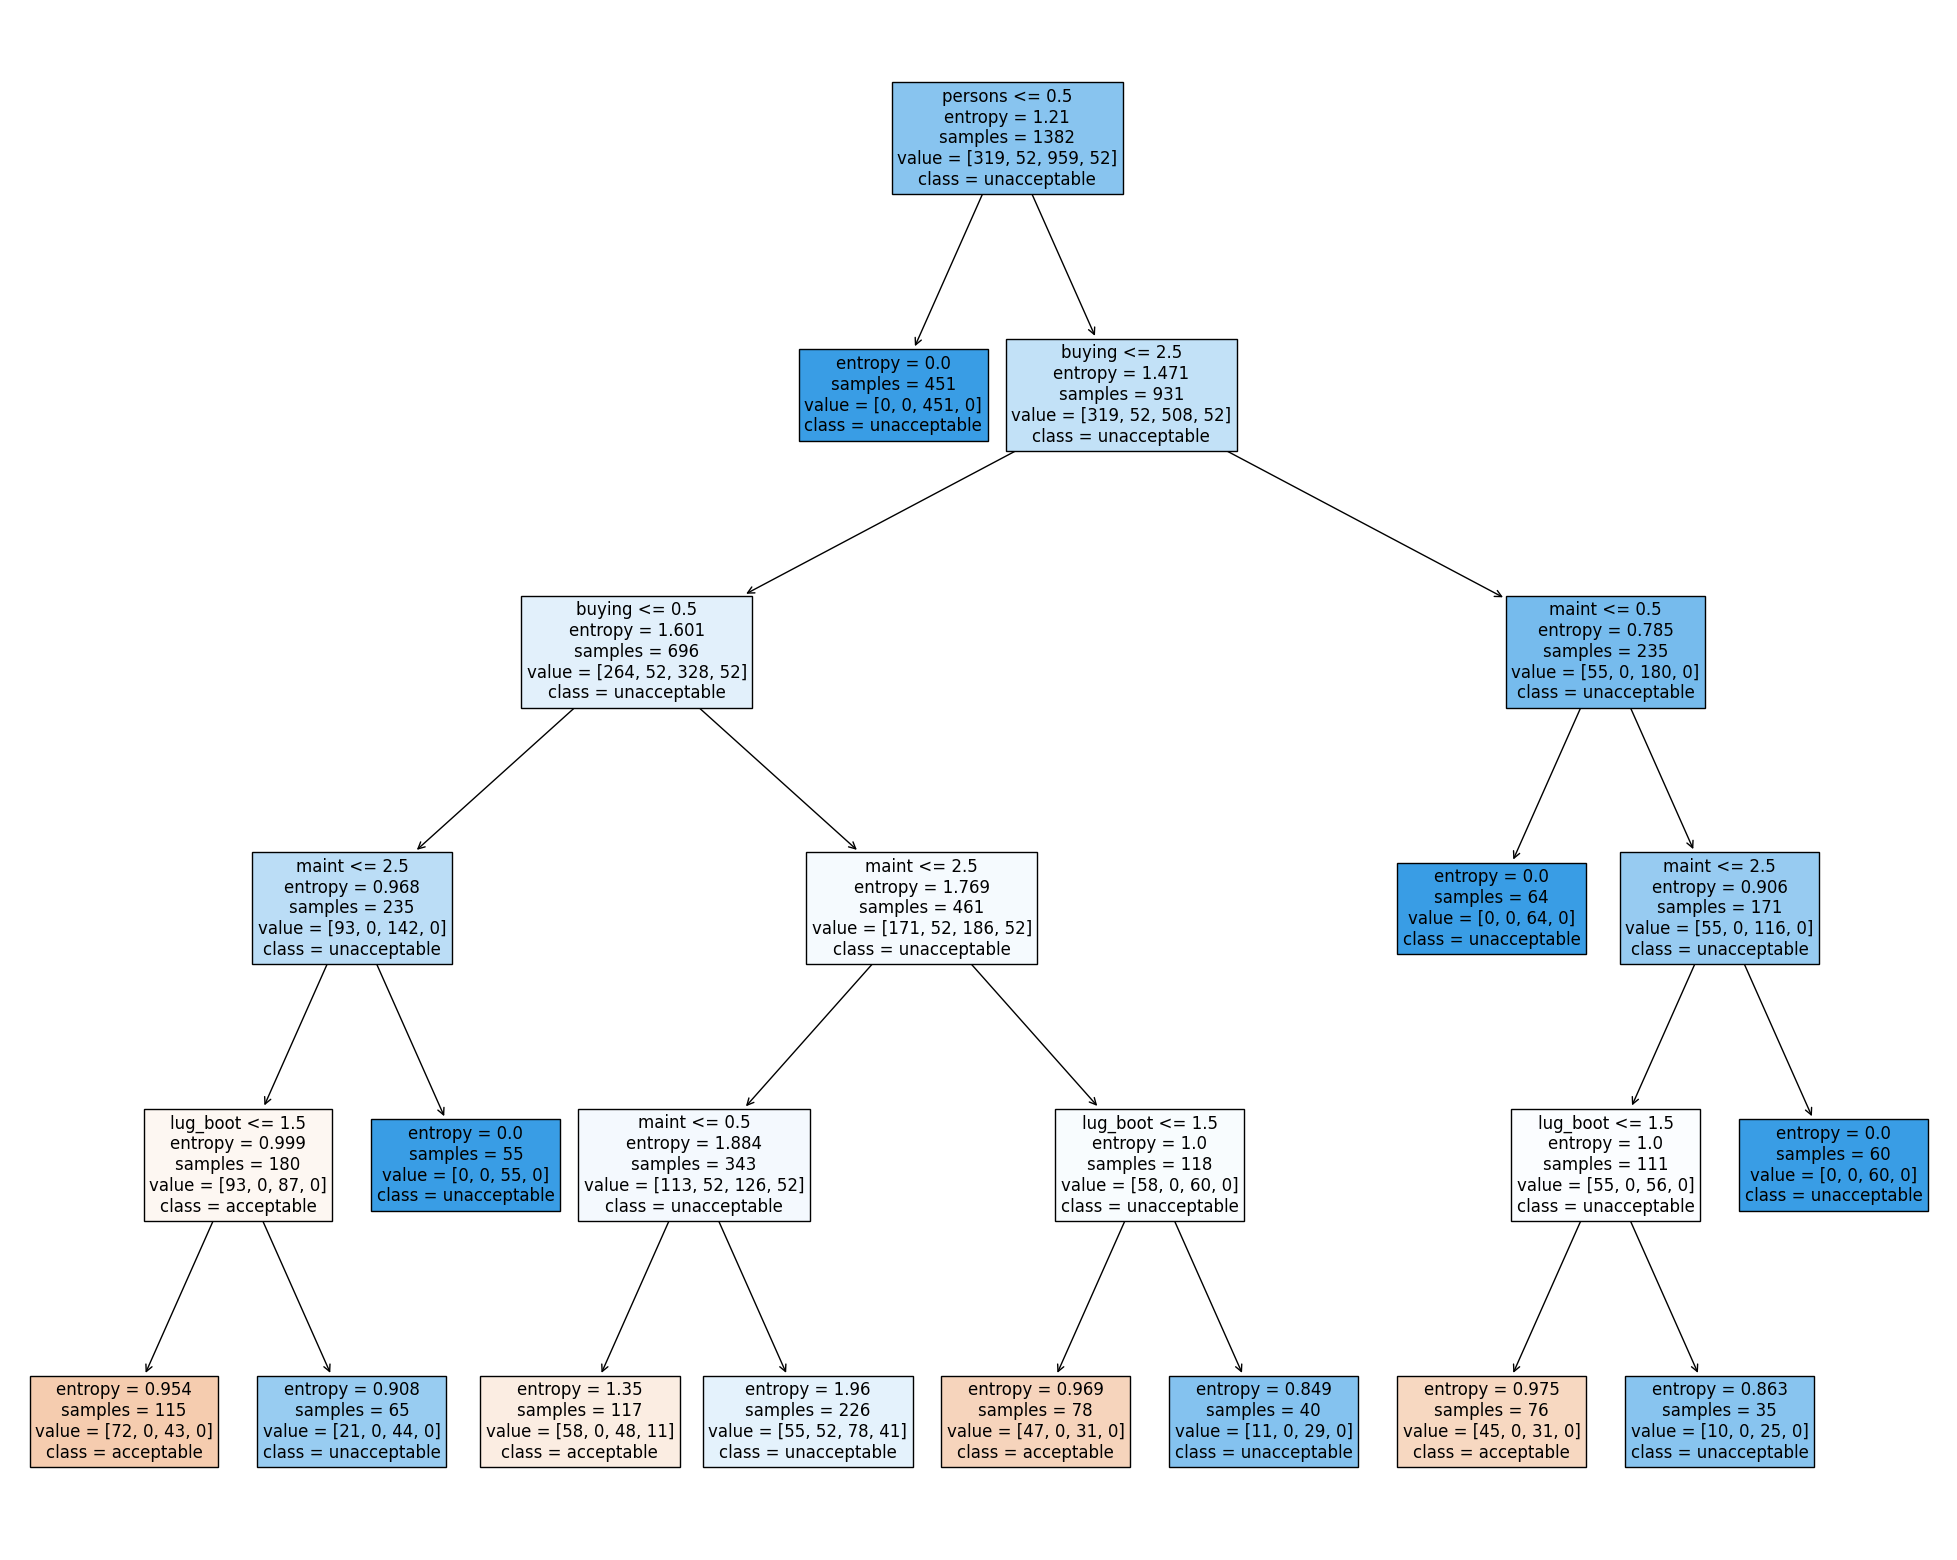

In [ ]:
feature_names = X.columns

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree,
                   feature_names=feature_names,
                   class_names={0:'acceptable', 1:'good', 2:'unacceptable', 3:'vgood'}, #fill in the class-labels here for displaying
                   filled=True,
                  fontsize=12)